In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter
import matplotlib.pyplot as plt 
import seaborn as sns
np.random.seed(639)
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_parquet('../CleanData/steam_games.parquet')
df.head()

,id,app_name,title,price,developer,release_date,tag_1980s,tag_1990's,tag_2.5D,tag_2D,...,spec_Single-player,spec_Stats,spec_Steam Achievements,spec_Steam Cloud,spec_Steam Leaderboards,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled
0,761140,Lost Summoner Kitty,Lost Summoner Kitty,4.99,Kotoshiro,2018-01-04,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,Ironbound,0.00,Secret Level SRL,2018-01-04,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,Real Pool 3D - Poolians,0.00,Poolians.com,2017-07-24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,767400,弹炸人2222,弹炸人2222,0.99,彼岸领域,2017-12-07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,772540,Battle Royale Trainer,Battle Royale Trainer,3.99,Trickjump Games Ltd,2018-01-04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_names = df[['id', 'app_name']]

In [28]:
df.drop(columns= ['title', 'developer', 'app_name'], inplace= True)

In [29]:
df['Year'] = df['release_date'].dt.year
df.drop(columns='release_date', inplace= True)
df.head()

,id,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,...,spec_Stats,spec_Steam Achievements,spec_Steam Cloud,spec_Steam Leaderboards,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled,Year
0,761140,4.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
1,643980,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
2,670290,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
3,767400,0.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
4,772540,3.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 0 to 28898
Columns: 493 entries, id to Year
dtypes: float64(1), int32(492)
memory usage: 54.7 MB


In [31]:
df_names.head()

,id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,772540,Battle Royale Trainer


In [32]:
df_features = pd.read_parquet('item_item_features.parquet')
df_features.reset_index(inplace=True)
df_features.rename(columns={'item_id': 'id'}, inplace= True)
df_features.head()

,id,playtime_forever,playtime_2weeks
0,10,17107858,46656
1,20,960524,14117
2,30,756375,14042
3,40,154424,38
4,50,726545,2485


In [33]:
df = df.merge(df_features, how='left')
df.head()

,id,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,...,spec_Steam Cloud,spec_Steam Leaderboards,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled,Year,playtime_forever,playtime_2weeks
0,761140,4.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2018,NaN,NaN
1,643980,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2018,NaN,NaN
2,670290,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,NaN,NaN
3,767400,0.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,NaN,NaN
4,772540,3.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2018,NaN,NaN


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df_sent = pd.read_parquet('../sentiment_analysis_2.parquet')
df_sent.head()

,user_id,item_id,sentiment_analysis_2,recommend,Año
0,76561197970982479,1250,2,1,2011
1,76561197970982479,22200,2,1,2011
2,76561197970982479,43110,2,1,2011
3,js41637,251610,2,1,2014
4,js41637,227300,2,1,2013


In [36]:
df_sent.duplicated().sum()

0

In [37]:
df_sent.drop(columns=['user_id', 'Año'], inplace=True)
df_sent_grouped = df_sent.groupby('item_id').agg(sum)
df_sent_grouped.rename(columns={'sentiment_analysis_2': 'rating'}, inplace=True)
df_sent_grouped.reset_index(inplace=True)
df_sent_grouped.rename(columns={'item_id': 'id'}, inplace=True)

In [38]:
df_sent_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         3682 non-null   int32
 1   rating     3682 non-null   int32
 2   recommend  3682 non-null   int32
dtypes: int32(3)
memory usage: 43.3 KB


In [39]:
df_sent_grouped.head()

,id,rating,recommend
0,10,89,55
1,20,26,11
2,30,7,3
3,40,2,1
4,50,8,3


In [40]:
df = df.merge(df_sent_grouped, how='left')
df.head()

,id,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,...,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled,Year,playtime_forever,playtime_2weeks,rating,recommend
0,761140,4.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018,NaN,NaN,NaN,NaN
1,643980,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018,NaN,NaN,NaN,NaN
2,670290,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2017,NaN,NaN,NaN,NaN
3,767400,0.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2017,NaN,NaN,NaN,NaN
4,772540,3.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018,NaN,NaN,NaN,NaN


In [41]:
df_items = df.drop(columns='id')

<Axes: xlabel='playtime_forever', ylabel='Count'>

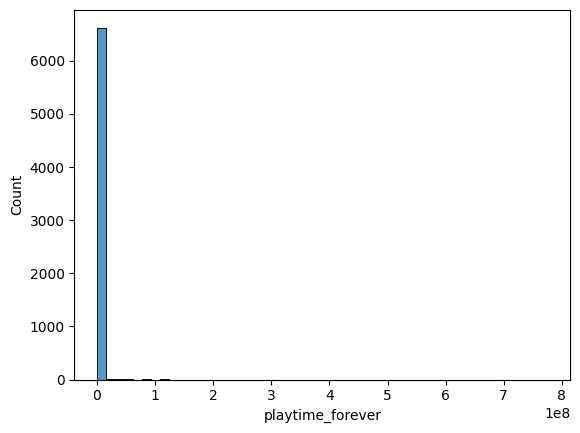

In [18]:
sns.histplot(df_items['playtime_forever'], bins=50)

<Axes: xlabel='playtime_2weeks', ylabel='Count'>

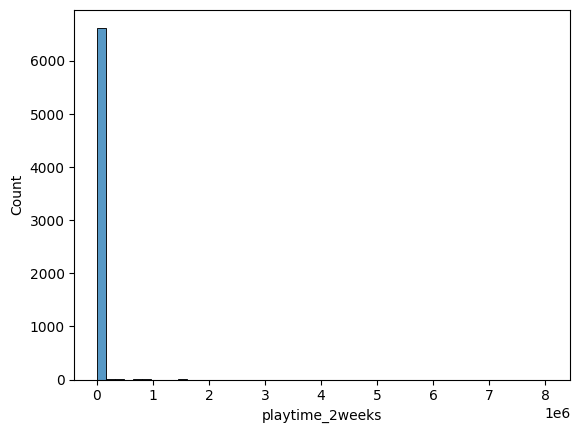

In [19]:
sns.histplot(df_items['playtime_2weeks'], bins=50)

<Axes: xlabel='recommend', ylabel='Count'>

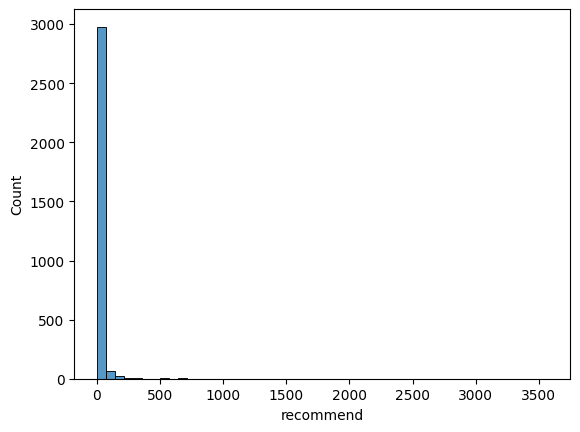

In [20]:
sns.histplot(df_items['recommend'], bins=50)

<Axes: xlabel='rating', ylabel='Count'>

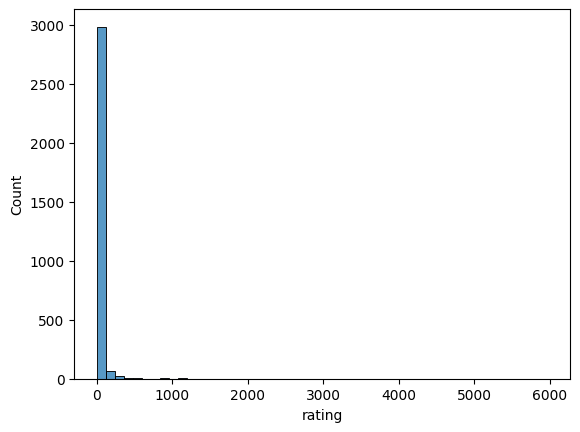

In [21]:
sns.histplot(df_items['rating'], bins=50)

In [22]:
# Crear la columna 'flag_imputado' con valor 0 por defecto
#df_items['flag_imputado'] = 0

# Marcar los registros donde 'playtime_forever' fue imputado (son los mismos en los que playtime_2weeks fue imputado)
#df_items.loc[df_items['playtime_forever'].isna(), 'flag_imputado'] = 1

In [23]:
# Filtra los valores no nulos en la columna 'playtime_forever'
#no_nulos = df_items['playtime_forever'].dropna()

# Calcula la distribución acumulativa (CDF) de los valores no nulos
#cdf = no_nulos.value_counts(normalize=True).sort_index().cumsum()

# Genera números aleatorios entre 0 y 1 (la cantidad de nulos que quieres imputar)
#random_values = np.random.rand(df_items['playtime_forever'].isnull().sum())

# Usa la inversa de la CDF para asignar valores imputados
#imputed_values = np.searchsorted(cdf.values, random_values)

# Asigna los valores imputados a los nulos en la columna 'playtime_forever'
#df_items.loc[df_items['playtime_forever'].isnull(), 'playtime_forever'] = cdf.index[imputed_values]

# Recortamos los valores minimos y maximos
#df_items['playtime_forever'] = df_items['playtime_forever'].clip(lower=no_nulos.min(), upper=no_nulos.max())


In [24]:
# el mismo procedimiento para la columna playtime_2weeks
#no_nulos = df_items['playtime_2weeks'].dropna()

#cdf = no_nulos.value_counts(normalize=True).sort_index().cumsum()

#random_values = np.random.rand(df_items['playtime_2weeks'].isnull().sum())

#imputed_values = np.searchsorted(cdf.values, random_values)

#df_items.loc[df_items['playtime_2weeks'].isnull(), 'playtime_2weeks'] = cdf.index[imputed_values]

#df_items['playtime_2weeks'] = df_items['playtime_2weeks'].clip(lower=no_nulos.min(), upper=no_nulos.max())

In [42]:
df_items['playtime_forever'].fillna(0, inplace=True)
df_items['playtime_2weeks'].fillna(0, inplace=True)

In [43]:
scaler = StandardScaler()
df_items['playtime_forever'] = scaler.fit_transform(df_items['playtime_forever'].array.reshape(-1,1))

In [44]:
scaler = StandardScaler()
df_items['playtime_2weeks'] = scaler.fit_transform(df_items['playtime_2weeks'].array.reshape(-1,1))

In [45]:
df_items['recommend'].fillna(np.nanmedian(df_items['recommend']), inplace=True)
df_items['rating'].fillna(np.nanmedian(df_items['rating']), inplace=True)

In [46]:
scaler = StandardScaler()
df_items['recommend'] = scaler.fit_transform(df_items['recommend'].array.reshape(-1,1))

In [47]:
scaler = StandardScaler()
df_items['rating'] = scaler.fit_transform(df_items['rating'].array.reshape(-1,1))

In [48]:
df_items.isna().sum().sum()

0

In [49]:
df_items.head()

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,...,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled,Year,playtime_forever,playtime_2weeks,rating,recommend
0,4.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018,-0.026461,-0.026324,-0.040884,-0.038933
1,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018,-0.026461,-0.026324,-0.040884,-0.038933
2,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2017,-0.026461,-0.026324,-0.040884,-0.038933
3,0.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2017,-0.026461,-0.026324,-0.040884,-0.038933
4,3.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018,-0.026461,-0.026324,-0.040884,-0.038933


In [ ]:
df_items.to_parquet('item_features_complete.parquet')
df_names.to_parquet('item_names.parquet')

In [39]:
def item_item_recom(item_id, n_recom=5, umbral= 0.9999999):
    
    try: 
        item_id = int(item_id)
        indice = df_names[df_names['id'] == item_id].index[0]
    except Exception as e:
        print(f'Error: {e}')
        return print('Ingrese un Id de producto válido')
    
    similaridades = {}
    contador = 0
    for i in range(len(df_items)):
        if i != indice:
            sim = cosine_similarity(df_items.iloc[indice,:].values.reshape(1,-1), df_items.iloc[i,:].values.reshape(1,-1))[0][0]
            similaridades[i] = sim
            if sim > umbral:
                contador += 1
            if contador > n_recom:
                break
    
    similaridades_sorted = sorted(similaridades.items(), key= itemgetter(1), reverse=True)
    #print(similaridades_sorted)
    #print(f'Similaridades: {similaridades_sorted[0:n_recom]}') ## codigo para verificar

    items_recomendados = []

    for i in range(n_recom):
        items_recomendados.append(similaridades_sorted[i][0])

    #print(items_recomendados)
        
    return df_names.loc[items_recomendados,'app_name']

In [29]:
len(df_names)

28899

In [30]:
len(df_items)

28899

In [42]:
df_names.head()

,id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,772540,Battle Royale Trainer


In [40]:
item_item_recom(761140)     # item del indice cero

7370                 Oblivion's Edge
23435        Games of Glory - "Star"
3273     Official Guide - Millennium
4204             RymdResa Soundtrack
13344           I Can See the Future
Name: app_name, dtype: object

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
df_items.loc[[0, 7370, 23435, 3273, 4204, 13344],:]     # verificamos que los recomendados sean similares

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [44]:
df_names.sample()

,id,app_name
4186,393650,RFLEX - The Awesome Soundtrack


In [45]:
item_item_recom(393650)

12795          Game-Ready - FREE Collection
8276                       Dreamlike Worlds
8485     State of Anarchy: Master of Mayhem
8720                                aMAZE 2
8918                          Gaben Kingdom
Name: app_name, dtype: object

In [49]:
df_items.loc[[4186, 12795, 8276, 8485, 8720, 8918],:]     # verificamos que los recomendados sean similares

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [53]:
df['playtime_forever'].idxmax()

1033

In [55]:
df_names.loc[1033, :]

id                                       730
app_name    Counter-Strike: Global Offensive
Name: 1033, dtype: object

In [68]:
item_item_recom(730)

47           Garry's Mod
28646    Team Fortress 2
26503               Rust
27067           Warframe
28048           Terraria
Name: app_name, dtype: object

In [69]:
df_items.loc[[1033, 47, 28646, 26503, 27067, 28048],:]

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [58]:
df_items.loc[[1033, 23042, 27039, 25601, 2647, 2820],:]

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [65]:
df_items.loc[[1033, 28646, 47, 15057, 28048, 26503],:]

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [ ]:
# dado que la mayor parte de los juegos no fueron jugados aún, las recomendaciones no son homogéneas, es decir, con la similitud de coseno
# se obtienen ítems que son más similares en las variables playtime, rating y recommend.
# por lo tanto, para recomendar juegos que sean similares en cuanto a género, eliminamos las features anteriores.

In [72]:
df_items.iloc[:,:-4].head()

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [73]:
def item_item_recom(item_id, n_recom=5, umbral= 0.9999999):
    
    try: 
        item_id = int(item_id)
        indice = df_names[df_names['id'] == item_id].index[0]
    except Exception as e:
        print(f'Error: {e}')
        return print('Ingrese un Id de producto válido')
    
    similaridades = {}
    contador = 0
    for i in range(len(df_items)):
        if i != indice:
            sim = cosine_similarity(df_items.iloc[indice,:-4].values.reshape(1,-1), df_items.iloc[i,:-4].values.reshape(1,-1))[0][0]
            similaridades[i] = sim
            if sim > umbral:
                contador += 1
            if contador > n_recom:
                break
    
    similaridades_sorted = sorted(similaridades.items(), key= itemgetter(1), reverse=True)
    #print(similaridades_sorted)
    #print(f'Similaridades: {similaridades_sorted[0:n_recom]}') ## codigo para verificar

    items_recomendados = []

    for i in range(n_recom):
        items_recomendados.append(similaridades_sorted[i][0])

    #print(items_recomendados)
        
    return df_names.loc[items_recomendados,'app_name']

In [74]:
item_item_recom(730)

11036    Warhammer 40,000: Sanctus Reach - Sons of Cadia
12608          LEGO® Marvel Super Heroes 2 - Season Pass
5410                    OMSI 2 Add-On Citybus O405/O405G
6388                         Order of Battle: Winter War
3253                Oceanhorn: Monster of Uncharted Seas
Name: app_name, dtype: object

In [75]:
df_items.loc[[1033, 11036, 12608, 5410, 6388, 3253],:]

,price,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_Abstract,tag_Accounting,tag_Action,tag_Action RPG,tag_Action-Adventure,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Base Building,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Beat 'em up,tag_Benchmark,tag_Blood,tag_Board Game,tag_Bowling,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Cold War,tag_Colorful,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Crafting,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Episodic,tag_Experience,tag_Experimental,tag_Exploration,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Fast-Paced,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Foreign,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Horror,tag_Horses,tag_Hunting,tag_Illuminati,tag_Indie,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Kickstarter,tag_LEGO,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Loot,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Match 3,tag_Mature,tag_Mechs,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Naval,tag_Ninja,tag_Noir,tag_Nonlinear,tag_Nudity,tag_Offroad,tag_On-Rails Shooter,tag_Online Co-Op,tag_Open World,tag_Otome,tag_Parkour,tag_Parody,tag_Party-Based RPG,tag_Perma Death,tag_Philisophical,tag_Photo Editing,tag_Physics,tag_Pinball,tag_Pirates,tag_Pixel Graphics,tag_Platformer,tag_Point & Click,tag_Political,tag_Politics,tag_Pool,tag_Post-apocalyptic,tag_Procedural Generation,tag_Programming,tag_Psychedelic,tag_Psychological,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvE,tag_PvP,tag_Quick-Time Events,tag_RPG,tag_RPGMaker,tag_RTS,tag_Racing,tag_Real Time Tactics,tag_Real-Time,tag_Real-Time with Pause,tag_Realistic,tag_Relaxing,tag_Remake,tag_Replay Value,tag_Resource Management,tag_Retro,tag_Rhythm,tag_Robots,tag_Rogue-like,tag_Rogue-lite,tag_Romance,tag_Rome,tag_Runner,tag_Sailing,tag_Sandbox,tag_Satire,tag_Sci-fi,tag_Science,tag_Score Attack,tag_Sexual Content,tag_Shoot 'Em Up,tag_Shooter,tag_Short,tag_Side Scroller,tag_Silent Protagonist,tag_Simulation,tag_Singleplayer,tag_Sniper,tag_Soccer,tag_Software,tag_Software Training,tag_Sokoban,tag_Soundtrack,tag_Space,tag_Space Sim,tag_Spectacle fighter,tag_Spelling,tag_Split Scre

In [76]:
df_names.iloc[[1033, 11036, 12608, 5410, 6388, 3253],:]

,id,app_name
1033,730,Counter-Strike: Global Offensive
11036,716660,"Warhammer 40,000: Sanctus Reach - Sons of Cadia"
12608,720680,LEGO® Marvel Super Heroes 2 - Season Pass
5410,434061,OMSI 2 Add-On Citybus O405/O405G
6388,458860,Order of Battle: Winter War
3253,339200,Oceanhorn: Monster of Uncharted Seas
